In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [8]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 4), round(m-h, 4), round(m+h, 4)

In [10]:
platform = pd.read_csv('Platforms.csv')
no_cheaters = pd.read_csv('no_cheaters.csv')

In [12]:
platform.duplicated().sum()

7560000

In [14]:
platform = platform.drop_duplicates(subset=['user_id','platform'])

In [16]:
platform.platform.unique()

array(['XBox', 'PC', 'PS4'], dtype=object)

In [18]:
no_cheaters = no_cheaters.merge(platform, on='user_id',how='left')

#### Фильтрация данных для пользователей различных платформ и групп

In [21]:
XBox_test = no_cheaters[(no_cheaters['group']=='test')&(no_cheaters['platform']=='XBox')]
XBox_control = no_cheaters[(no_cheaters['group']=='control')&(no_cheaters['platform']=='XBox')]

In [23]:
PC_test = no_cheaters[(no_cheaters['group']=='test')&(no_cheaters['platform']=='PC')]
PC_control = no_cheaters[(no_cheaters['group']=='control')&(no_cheaters['platform']=='PC')]

In [25]:
PS4_test = no_cheaters[(no_cheaters['group']=='test')&(no_cheaters['platform']=='PS4')]
PS4_control = no_cheaters[(no_cheaters['group']=='control')&(no_cheaters['platform']=='PS4')]

### Рассчет ARPU для различных платформ

#### для платформы XBox

In [29]:
arpu_XBox_test = XBox_test['money'].sum()/XBox_test['user_id'].nunique()
round(arpu_XBox_test, 4)

6.1328

In [31]:
arpu_XBox_control = XBox_control['money'].sum()/XBox_control['user_id'].nunique()
round(arpu_XBox_control, 4)

6.1035

#### для платформы PC

In [34]:
arpu_PC_test = PC_test['money'].sum()/PC_test['user_id'].nunique()
round(arpu_PC_test, 4)

6.269

In [36]:
arpu_PC_control = PC_control['money'].sum()/PC_control['user_id'].nunique()
round(arpu_PC_control, 4)

5.6462

#### для платформы PS4

In [39]:
arpu_PS4_test = PS4_test['money'].sum()/PS4_test['user_id'].nunique()
round(arpu_PS4_test, 4)

6.0849

In [41]:
arpu_PS4_control = PS4_control['money'].sum()/PS4_control['user_id'].nunique()
round(arpu_PS4_control, 4)

5.7376

### Рассчет ARPPU для различных платформ

#### Для платформы XBox

In [45]:
XBox_test_payers = XBox_test[XBox_test['money']>0]
XBox_control_payers = XBox_control[XBox_control['money']>0]

In [47]:
arppu_XBox_test = XBox_test_payers['money'].sum()/XBox_test_payers['user_id'].nunique()
round(arppu_XBox_test, 4)

6.1337

In [49]:
arppu_XBox_control = XBox_control_payers['money'].sum()/XBox_control_payers['user_id'].nunique()
round(arppu_XBox_control, 4)

6.1044

#### Для платформы PC

In [52]:
PC_test_payers = PC_test[PC_test['money']>0]
PC_control_payers = PC_control[PC_control['money']>0]

In [54]:
arppu_PC_test = PC_test_payers['money'].sum()/PC_test_payers['user_id'].nunique()
round(arppu_PC_test, 4)

6.2697

In [56]:
arppu_PC_control = PC_control_payers['money'].sum()/PC_control_payers['user_id'].nunique()
round(arppu_PC_control, 4)

5.6483

#### Для платформы PS4

In [59]:
PS4_test_payers = PS4_test[PS4_test['money']>0]
PS4_control_payers = PS4_control[PS4_control['money']>0]

In [61]:
arppu_PS4_test = PS4_test_payers['money'].sum()/PS4_test_payers['user_id'].nunique()
round(arppu_PS4_test, 4)

6.0859

In [63]:
arppu_PS4_control = PS4_control_payers['money'].sum()/PS4_control_payers['user_id'].nunique()
round(arppu_PS4_control, 4)

5.7395

### Рассчет средних трат внутриигровой валюты для различных платформ

#### Расчет доверительного интервала средних трат внутриигровой валюты

In [77]:
### для XBox

In [67]:
test_interval = mean_confidence_interval(list(XBox_test['cash']), confidence=0.95)
test_interval

(6176.4029, 6169.9305, 6182.8753)

In [69]:
control_interval = mean_confidence_interval(list(XBox_control['cash']), confidence=0.95)
control_interval

(6131.7935, 6125.3354, 6138.2517)

In [73]:
groups = ['XBox_test', 'XBox_control']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

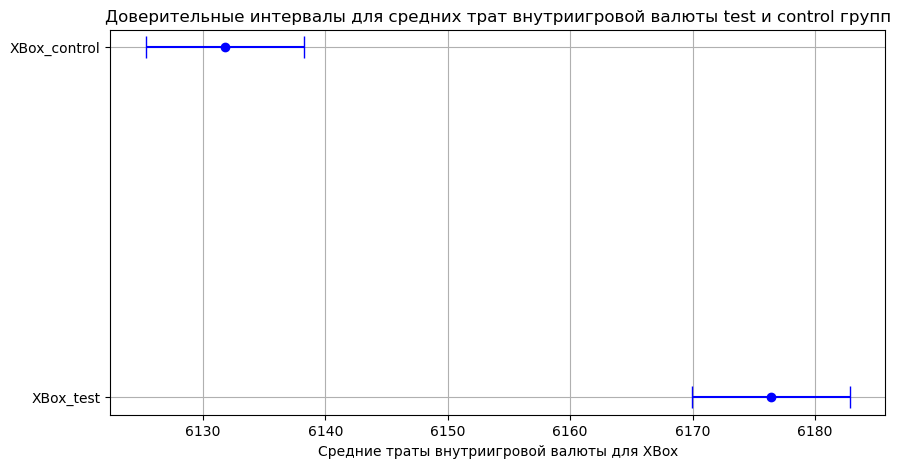

In [75]:
plt.figure(figsize=(10, 5))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=8)
plt.xlabel('Средние траты внутриигровой валюты для XBox')
plt.title('Доверительные интервалы для средних трат внутриигровой валюты test и control групп')
plt.grid(True)
plt.show()

In [107]:
### для PC

In [79]:
test_interval = mean_confidence_interval(list(PC_test['cash']), confidence=0.95)
test_interval

(6381.7456, 6375.0147, 6388.4766)

In [81]:
control_interval = mean_confidence_interval(list(PC_control['cash']), confidence=0.95)
control_interval

(5587.1022, 5581.3766, 5592.8277)

In [83]:
groups = ['PC_test', 'PC_control']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

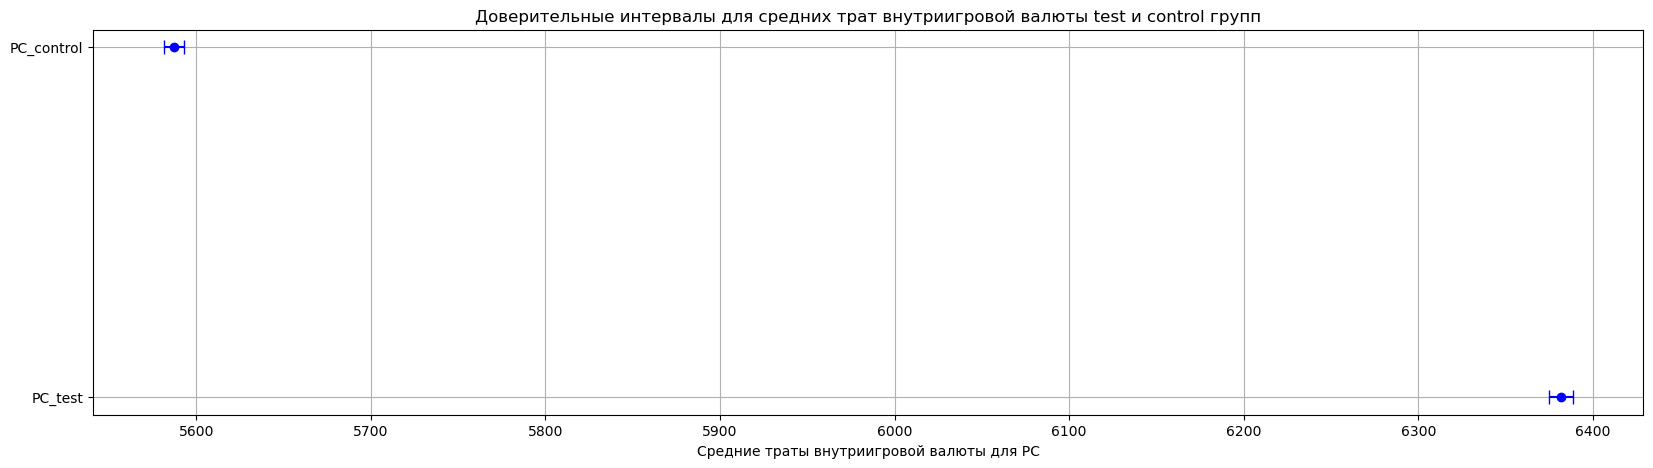

In [105]:
plt.figure(figsize=(20, 5))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=5)
plt.xlabel('Средние траты внутриигровой валюты для PC')
plt.title('Доверительные интервалы для средних трат внутриигровой валюты test и control групп')
plt.grid(True)
plt.show()

In [109]:
### для PS4

In [111]:
test_interval = mean_confidence_interval(list(PS4_test['cash']), confidence=0.95)
test_interval

(6130.4933, 6124.1899, 6136.7966)

In [113]:
control_interval = mean_confidence_interval(list(PS4_control['cash']), confidence=0.95)
control_interval

(5681.9362, 5675.7683, 5688.104)

In [115]:
groups = ['PS4_test', 'PS4_control']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

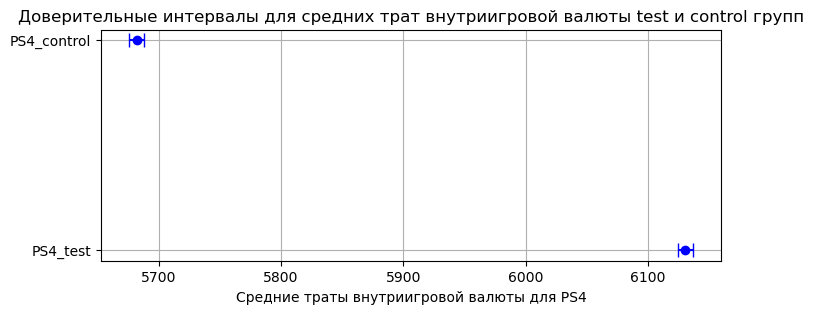

In [123]:
plt.figure(figsize=(8, 3))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=5)
plt.xlabel('Средние траты внутриигровой валюты для PS4')
plt.title('Доверительные интервалы для средних трат внутриигровой валюты test и control групп')
plt.grid(True)
plt.show()

### Расчет доверительного интервала ARPU для пользователей XBox

In [98]:
test_interval = mean_confidence_interval(list(XBox_test['money']), confidence=0.95)
test_interval

(6.1328, 6.1239, 6.1416)

In [99]:
control_interval = mean_confidence_interval(list(XBox_control['money']), confidence=0.95)
control_interval

(6.1035, 6.0947, 6.1123)

In [100]:
groups = ['test_group', 'control_group']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

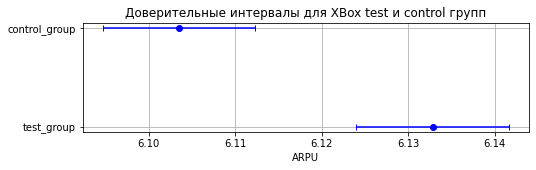

In [101]:
plt.figure(figsize=(8, 2))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=3)
plt.xlabel('ARPU')
plt.title('Доверительные интервалы для XBox test и control групп')
plt.grid(True)
plt.show()

#### Расчет доверительного интервала для пользователей PC

In [102]:
test_interval = mean_confidence_interval(list(PC_test['money']), confidence=0.95)
test_interval

(6.269, 6.2601, 6.278)

In [103]:
control_interval = mean_confidence_interval(list(PC_control['money']), confidence=0.95)
control_interval

(5.6462, 5.6378, 5.6546)

In [104]:
groups = ['test_group', 'control_group']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

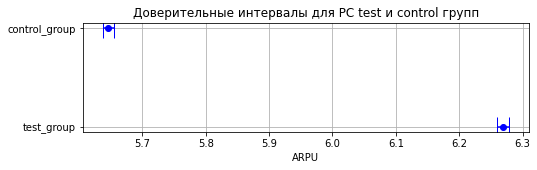

In [105]:
plt.figure(figsize=(8, 2))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=10)
plt.xlabel('ARPU')
plt.title('Доверительные интервалы для PC test и control групп')
plt.grid(True)
plt.show()

#### Расчет доверительного интервала для пользователей PS4

In [106]:
test_interval = mean_confidence_interval(list(PS4_test['money']), confidence=0.95)
test_interval

(6.0849, 6.0762, 6.0936)

In [107]:
control_interval = mean_confidence_interval(list(PS4_control['money']), confidence=0.95)
control_interval

(5.7376, 5.729, 5.7463)

In [108]:
groups = ['test_group', 'control_group']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

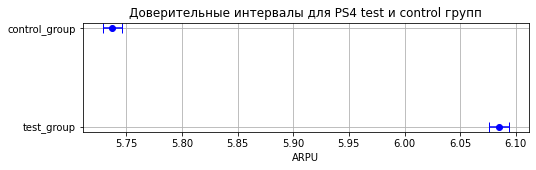

In [109]:
plt.figure(figsize=(8, 2))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=5)
plt.xlabel('ARPU')
plt.title('Доверительные интервалы для PS4 test и control групп')
plt.grid(True)
plt.show()